In [1]:
'''
【课程1.6】  正太性检验

利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验

'''

'\n【课程1.6】  正太性检验\n\n利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。\n\n直方图初判 / QQ图判断 / K-S检验\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

       value
0  10.044888
1   9.339186
2  10.595500
3  10.281201
4   9.008428


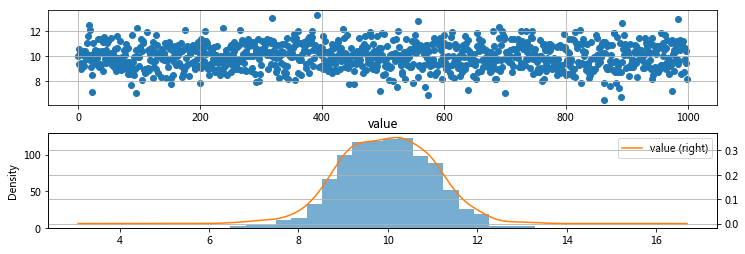

In [6]:
# 直方图初判

s = pd.DataFrame(np.random.randn(1000)+10,columns=['value'])  # 创建随机数据
print(s.head())

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index,s.values)                     # 绘制数据分布图
plt.grid()

ax2 = fig.add_subplot(2,1,2)
s.hist(bins=20,alpha=0.6,ax=ax2)                  # 绘制直方图
s.plot(kind='kde',secondary_y=True,ax=ax2)        # 呈现较明显的正太性
plt.grid()

       value
0   9.414313
1   8.821585
2   9.408567
3  10.442870
4   9.456977
均值为:10.004290557836402,标准差为:0.9907516430964619
   index     value       p         q
0    293  6.899799 -0.0005 -3.133471
1    106  6.994977  0.0005 -3.037405
2    388  7.184531  0.0015 -2.846081
3    472  7.276520  0.0025 -2.753234
4    963  7.340970  0.0035 -2.688182


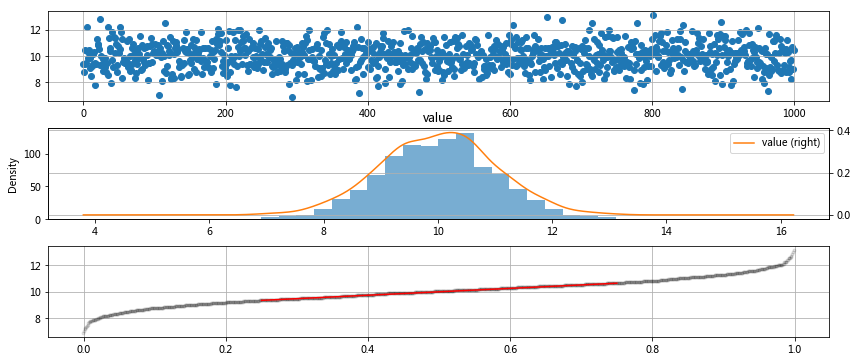

In [14]:
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

s = pd.DataFrame(np.random.randn(1000)+10,columns=['value']) # 创建随机数据
print(s.head())
mean = s['value'].mean()
std = s['value'].std()
print(f'均值为:{mean},标准差为:{std}')                       #  计算均值，标准差

s.sort_values(by='value',inplace=True)                       # 重新排序
s_r = s.reset_index(drop=False)                              # 重新排序后，更新index
s_r['p'] = (s_r.index-0.5)/len(s_r)                          # 计算百分位数 p(i)
s_r['q'] = (s_r.value-mean)/std                              # 计算q值
print(s_r.head())

st = s['value'].describe()                                   # 计算四分之一位数、四分之三位数
x1,y1 = 0.25,st['25%']                        
x2,y2 = 0.75,st['75%']

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(3,1,1)                        # 创建子图1
ax1.scatter(s.index,s.value)                        # 绘制数据分布图
plt.grid()

ax2 = fig.add_subplot(3,1,2)                        # 创建子图2
s.hist(bins=20,alpha=0.6,ax=ax2)                    # 绘制直方图
s.plot(kind='kde',secondary_y=True,ax=ax2)
plt.grid()

ax3 = fig.add_subplot(3,1,3)                        # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha=0.1)
ax3.plot([x1,x2],[y1,y2],'-r')                      # 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布
plt.grid()


均值为:79.74285714285715,标准差为:5.937631024648968
观测的D值为:0.15965714285714283


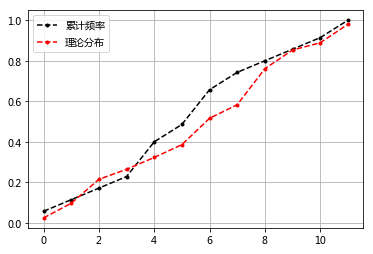

In [17]:
# KS检验，理论推导

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,         # 样本数据，35位健康男性在未进食之前的血糖浓度
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
df = pd.DataFrame(data,columns=['value'])
mean = df['value'].mean()
std = df['value'].std()
print(f'均值为:{mean},标准差为:{std}')                     # 查看数据基本统计量

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})  # 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数']/len(data)
df_s['标准化取值'] = (df_s['血糖浓度']-mean)/std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率']-df_s['理论分布'])
d_max = df_s['D'].max()
print(f'观测的D值为:{d_max}')                                # D值序列计算结果表格

df_s['累计频率'].plot(style='--k.')                          # 密度图表示
df_s['理论分布'].plot(style='--r.')
plt.legend(loc='upper left')
plt.grid()

In [19]:
# 直接用算法做KS检验

from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
df = pd.DataFrame(data,columns=['value'])
mean = df['value'].mean()
std = df['value'].std()

stats.kstest(df['value'],'norm',(mean,std))

'''
 .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
 结果返回两个值：statistic → D值，pvalue → P值
 p值大于0.05，为正态分布

'''

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)